In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_excel(r"Data_Train.xlsx")

In [9]:
pd.set_option('display.max_columns',None)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
df.shape

(10683, 11)

In [13]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

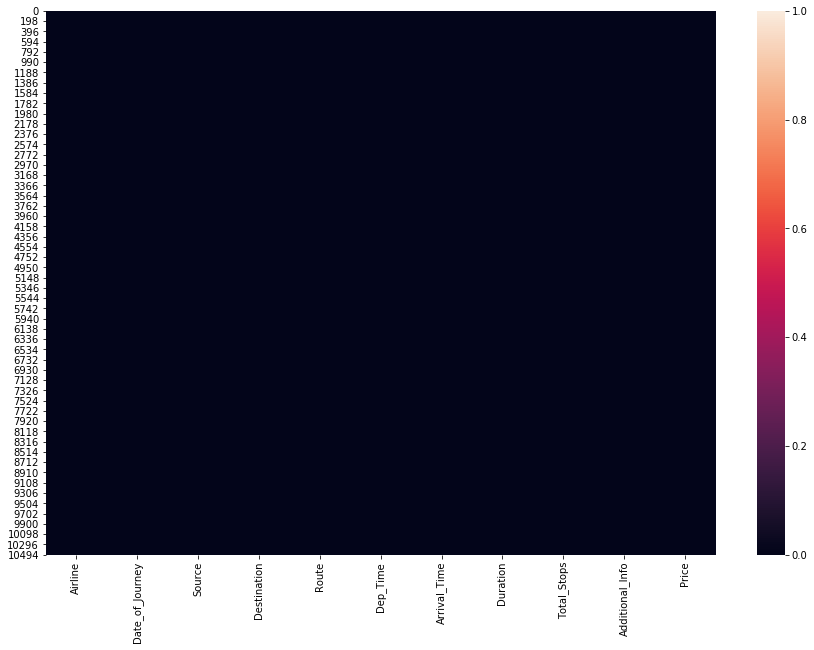

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull())
plt.show()

In [16]:
df.Airline.nunique()

12

In [17]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Figure size 1080x1080 with 0 Axes>

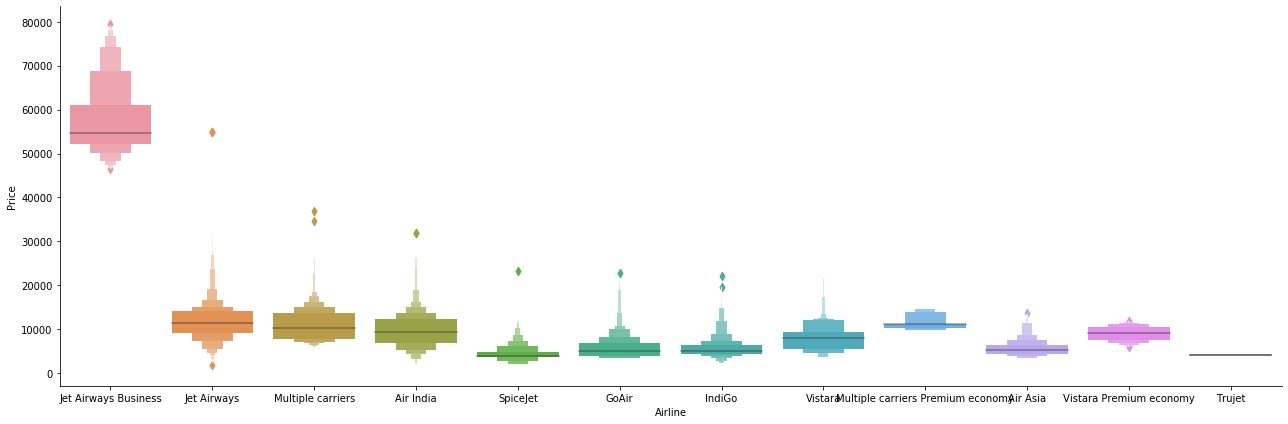

In [18]:
plt.figure(figsize=(15,15))
sns.catplot(x = "Airline",y="Price",data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [19]:
Airline = pd.get_dummies(df["Airline"],drop_first=True)

In [20]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [21]:
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [22]:
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [23]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [24]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [25]:
Source = pd.get_dummies(df["Source"],drop_first=True)

In [26]:
Destination = pd.get_dummies(df["Destination"],drop_first=True)

In [27]:
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [28]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [29]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [30]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4}, inplace=True)
Total_Stops = df.Total_Stops

In [31]:
Total_Stops

0        0.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
10678    0.0
10679    0.0
10680    0.0
10681    0.0
10682    2.0
Name: Total_Stops, Length: 10683, dtype: float64

In [32]:
Day = pd.DataFrame(list(pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day),columns={"Day"})

In [33]:
Month = pd.DataFrame(list(pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month),columns={"Month"})

In [34]:
Dep_Hour = pd.DataFrame(list(pd.to_datetime(df.Dep_Time).dt.hour),columns={"Dep_Hour"})

In [35]:
Dep_Min = pd.DataFrame(list(pd.to_datetime(df.Dep_Time).dt.minute),columns={"Dep_Min"})

In [36]:
Arr_Hour = pd.DataFrame(list(pd.to_datetime(df.Arrival_Time).dt.hour),columns={"Arr_Hour"})

In [37]:
Arr_Min = pd.DataFrame(list(pd.to_datetime(df.Arrival_Time).dt.minute),columns={"Arr_Min"})

In [38]:
Duration = list(df.Duration)
for i in range(len(Duration)):
    if len(Duration[i].split())!=2:
        if "h" in Duration[i]:
            Duration[i] = Duration[i]+" 0m"
        else:
            Duration[i] = "0h "+Duration[i]
for i in range(len(Duration)):
    Duration[i]=(int(Duration[i].split(sep = "h")[0])*60+int(Duration[i].split(sep = "m")[0].split()[-1]))

In [39]:
Duration = pd.DataFrame(Duration,columns={"Duration"})

In [40]:
Duration

,Duration
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [41]:
Train_Data = pd.concat([Airline,Source,Destination,Day,Month,Dep_Hour,
                        Dep_Min,Arr_Hour,Arr_Min,Total_Stops,Duration,df.Price],axis=1)

In [42]:
Train_Data.dropna(inplace=True)
Train_Data

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Total_Stops,Duration,Price
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,0.0,170,3897
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,5,50,13,15,2.0,445,7662
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,9,25,4,25,2.0,1140,13882
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,18,5,23,30,1.0,325,6218
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,16,50,21,35,1.0,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9,4,19,55,22,25,0.0,150,4107
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,20,45,23,20,0.0,155,4145
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,27,4,8,20,11,20,0.0,180,7229
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,3,11,30,14,10,0.0,160,12648


In [43]:
Train_Data.shape

(10682, 29)

In [44]:
df = pd.read_excel(r"Test_set.xlsx")
df.dropna(inplace=True)

In [45]:
pd.set_option('display.max_columns',None)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [46]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 229.5+ KB


In [48]:
df.shape

(2671, 10)

In [49]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [50]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

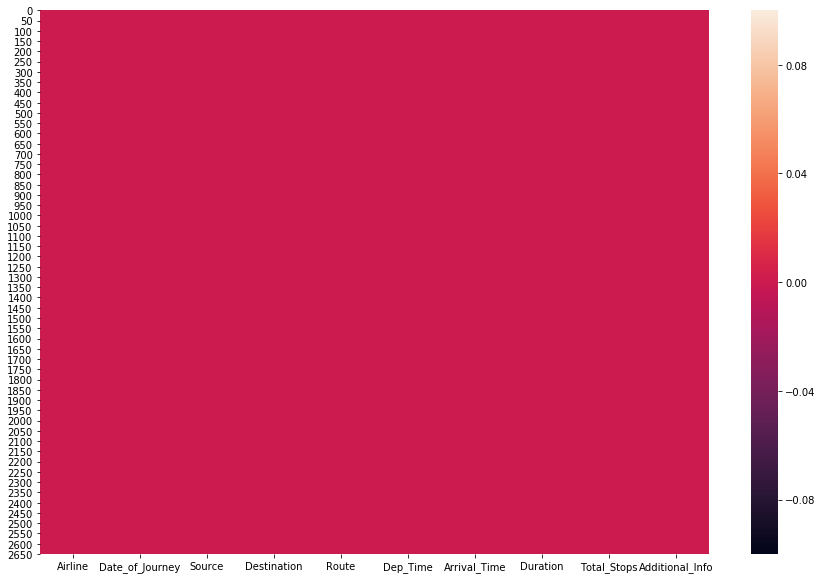

In [51]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull())
plt.show()

In [52]:
df.Airline.nunique()

11

In [53]:
df.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [54]:
Airline = pd.get_dummies(df["Airline"],drop_first=True)

In [55]:
print(Airline)

      Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0             0      0       0            1                     0   
1             0      0       1            0                     0   
2             0      0       0            1                     0   
3             0      0       0            0                     0   
4             0      0       0            0                     0   
...         ...    ...     ...          ...                   ...   
2666          1      0       0            0                     0   
2667          0      0       1            0                     0   
2668          0      0       0            1                     0   
2669          1      0       0            0                     0   
2670          0      0       0            0                     0   

      Multiple carriers  Multiple carriers Premium economy  SpiceJet  Vistara  \
0                     0                                  0         0        0   
1        

In [56]:
df.Source.unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [57]:
df.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [58]:
df.Destination.unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [59]:
df.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [60]:
Source = pd.get_dummies(df["Source"],drop_first=True)

In [61]:
Destination = pd.get_dummies(df["Destination"],drop_first=True)

In [62]:
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
2666,0,0,1,0
2667,0,0,1,0
2668,0,1,0,0
2669,0,1,0,0


In [63]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2666,0,0,0,0,0
2667,0,0,0,0,0
2668,1,0,0,0,0
2669,1,0,0,0,0


In [64]:
df.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [65]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4}, inplace=True)
Total_Stops = df.Total_Stops

In [66]:
Total_Stops[Total_Stops.isnull()]

Series([], Name: Total_Stops, dtype: int64)

In [67]:
Day = pd.DataFrame(list(pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day),columns={"Day"})

In [68]:
Month = pd.DataFrame(list(pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month),columns={"Month"})

In [69]:
Dep_Hour = pd.DataFrame(list(pd.to_datetime(df.Dep_Time).dt.hour),columns={"Dep_Hour"})

In [70]:
Dep_Min = pd.DataFrame(list(pd.to_datetime(df.Dep_Time).dt.minute),columns={"Dep_Min"})

In [71]:
Arr_Hour = pd.DataFrame(list(pd.to_datetime(df.Arrival_Time).dt.hour),columns={"Arr_Hour"})

In [72]:
Arr_Min = pd.DataFrame(list(pd.to_datetime(df.Arrival_Time).dt.minute),columns={"Arr_Month"})

In [73]:
Duration = list(df.Duration)
for i in range(len(Duration)):
    if len(Duration[i].split())!=2:
        if "h" in Duration[i]:
            Duration[i] = Duration[i]+" 0m"
        else:
            Duration[i] = "0h "+Duration[i]
for i in range(len(Duration)):
    Duration[i]=(int(Duration[i].split(sep = "h")[0])*60+int(Duration[i].split(sep = "m")[0].split()[-1]))

In [74]:
Duration = pd.DataFrame(Duration,columns={"Duration"})

In [75]:
Test_Data = pd.concat([Airline,Source,Destination,Day,Month,Dep_Hour,
                        Dep_Min,Arr_Hour,Arr_Min,Total_Stops,Duration],axis=1)

In [76]:
Test_Data.dropna(inplace=True)
Test_Data

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Month,Total_Stops,Duration
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6,17,30,4,25,1,655
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,6,20,10,20,1,240
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,19,15,19,0,1,1425
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,8,0,21,0,1,780
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,24,6,23,55,2,45,0,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,6,20,30,20,25,1,1435
2667,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,3,14,20,16,55,0,155
2668,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,3,21,50,4,25,1,395
2669,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,3,4,0,19,15,1,915


In [77]:
Test_Data.shape

(2671, 27)

In [78]:
Train_Data.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Day', 'Month', 'Dep_Hour', 'Dep_Min', 'Arr_Hour',
       'Arr_Min', 'Total_Stops', 'Duration', 'Price'],
      dtype='object')

In [79]:
X = Train_Data.drop("Price",axis=1)
y = Train_Data["Price"]

In [80]:
X

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Total_Stops,Duration
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,0.0,170
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,5,50,13,15,2.0,445
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,9,25,4,25,2.0,1140
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,18,5,23,30,1.0,325
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,16,50,21,35,1.0,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9,4,19,55,22,25,0.0,150
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,20,45,23,20,0.0,155
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,27,4,8,20,11,20,0.0,180
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,3,11,30,14,10,0.0,160


In [81]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

In [85]:
etr = ExtraTreesRegressor()
pd.DataFrame(list(y)).describe()
X.drop("Trujet",axis=1,inplace=True)

C:\Users\Surjeet\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [361]:
etr.fit(X,y)

ExtraTreesRegressor()

In [362]:
y_pred = etr.predict(Test_Data)

In [363]:
Train_Data.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Total_Stops,Duration,Price
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,0.0,170,3897
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,5,50,13,15,2.0,445,7662
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,9,25,4,25,2.0,1140,13882


In [364]:
Test_Data.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Month,Total_Stops,Duration
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6,17,30,4,25,1,655
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,6,20,10,20,1,240
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,19,15,19,0,1,1425


In [365]:
y_test = pd.read_excel("Sample_submission.xlsx")

In [366]:
y_test

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


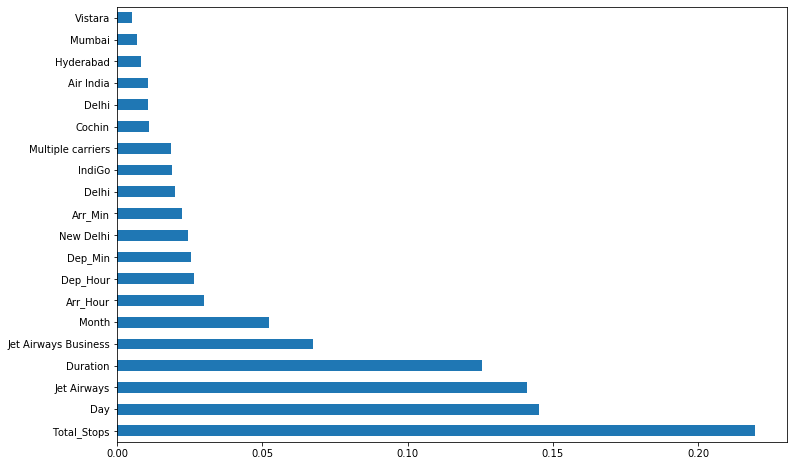

In [367]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [370]:
reg_rf.score(X_train, y_train)

0.9526268479910557

In [371]:
reg_rf.score(X_test, y_test)

0.8206080508452718

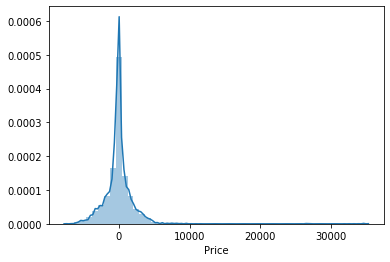

In [372]:
sns.distplot(y_test-y_pred)
plt.show()

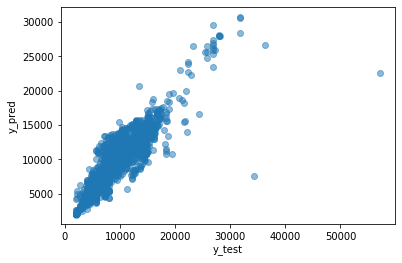

In [376]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [90]:
from sklearn import metrics

In [378]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1157.6252829376856
MSE: 3868059.3117754175
RMSE: 1966.7382418042869


In [379]:
metrics.r2_score(y_test, y_pred)

0.8206080508452718

In [380]:
from sklearn.model_selection import RandomizedSearchCV

In [381]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [382]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [383]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [384]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [385]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [386]:
prediction = rf_random.predict(X_test)

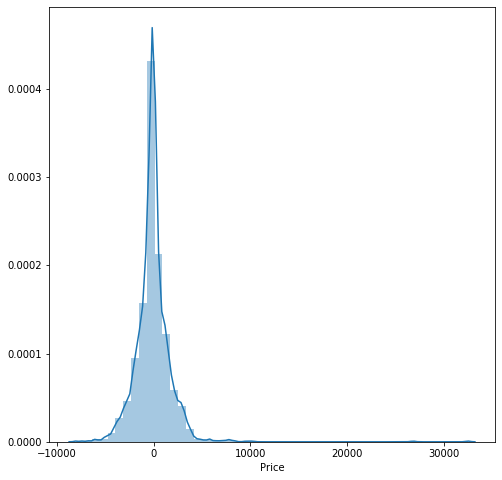

In [387]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

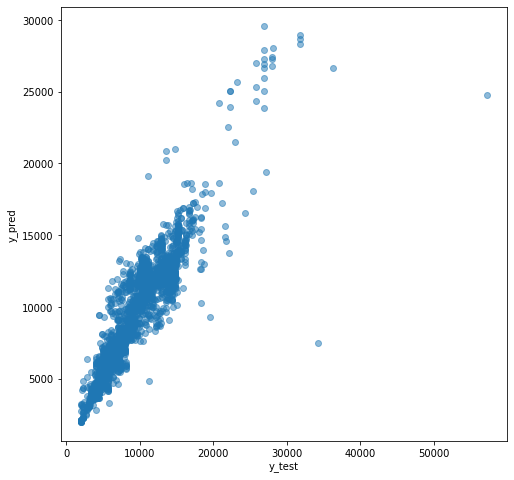

In [388]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [389]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1144.9465811899522
MSE: 3528358.671550695
RMSE: 1878.3925765267213


In [390]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [87]:
import pickle
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [88]:
y_prediction = forest.predict(X_test)

In [91]:
metrics.r2_score(y_test, y_prediction)

0.8206080508452718